C:\Users\janan\AppData\Local\Temp\ipykernel_3008\1833860963.py:71: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\janan\AppData\Local\Temp\ipykernel_3008\1833860963.py:71: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\janan\AppData\Local\Temp\ipykernel_3008\1833860963.py:71: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\janan\AppData\Local\Temp\ipykernel_3008\1833860963.py:71: UserWarning: Glyph 127903 (\N{ADMISSION TICKETS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\janan\AppData\Local\Temp\ipykernel_3008\1833860963.py:71: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\janan\AppData\Local\Temp\ipykernel_3008\1833860963.py:71: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\janan\anaconda3\

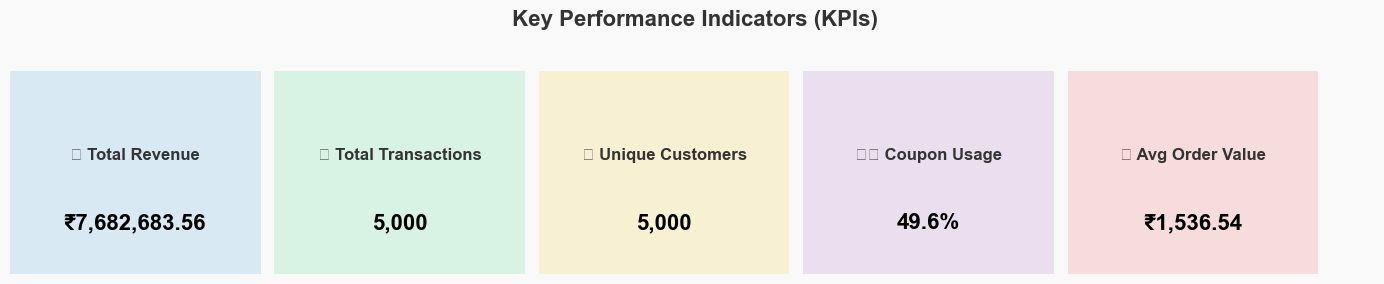

In [2]:
# --------------------------------------------------------
#  KPI Visualization — E-Commerce Marketing Dashboard
# --------------------------------------------------------
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# ---  Database Connection ---
def get_connection():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="Janani@1997",  # your MySQL password
        database="DB"
    )

# ---  Fetch KPI Data ---
conn = get_connection()
cursor = conn.cursor(dictionary=True)

# Total Revenue
cursor.execute("SELECT SUM((Quantity * Avg_Price) + Delivery_Charges) AS TotalRevenue FROM Online_Sales;")
total_revenue = cursor.fetchone()['TotalRevenue']

# Total Transactions
cursor.execute("SELECT COUNT(*) AS TotalTransactions FROM Online_Sales;")
total_txn = cursor.fetchone()['TotalTransactions']

# Unique Customers
cursor.execute("SELECT COUNT(DISTINCT CustomerID) AS UniqueCustomers FROM Online_Sales;")
unique_customers = cursor.fetchone()['UniqueCustomers']

# Coupon Usage %
cursor.execute("""
    SELECT (SUM(CASE WHEN Coupon_Status = 'Used' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS CouponUsage
    FROM Online_Sales;
""")
coupon_usage = cursor.fetchone()['CouponUsage']

# Average Order Value (AOV)
aov = total_revenue / total_txn

conn.close()

# ---  Prepare KPI Data ---
kpi_data = {
    " Total Revenue": f"₹{total_revenue:,.2f}",
    " Total Transactions": f"{total_txn:,}",
    " Unique Customers": f"{unique_customers:,}",
    " Coupon Usage": f"{coupon_usage:.1f}%",
    " Avg Order Value": f"₹{aov:,.2f}"
}

# ---  Visualization: KPI Cards ---
fig, ax = plt.subplots(figsize=(14, 3))
fig.patch.set_facecolor('#f9f9f9')
ax.axis("off")

# Colors for KPI cards
colors = ['#5DADE2', '#58D68D', '#F4D03F', '#AF7AC5', '#EC7063']

# Create cards
for i, (label, value) in enumerate(kpi_data.items()):
    ax.add_patch(plt.Rectangle((i*1.9, 0), 1.8, 1.2, color=colors[i], alpha=0.2, ec='none', lw=0))
    ax.text(i*1.9 + 0.9, 0.7, label, fontsize=12, ha='center', va='center', weight='bold', color='#333')
    ax.text(i*1.9 + 0.9, 0.3, value, fontsize=16, ha='center', va='center', weight='bold', color='#000')

plt.xlim(0, len(kpi_data)*2 - 0.2)
plt.ylim(0, 1.3)
plt.title(" Key Performance Indicators (KPIs)", fontsize=16, weight='bold', pad=20, color='#333')
plt.tight_layout()
plt.show()


C:\Users\janan\AppData\Local\Temp\ipykernel_11432\1290792371.py:25: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():
C:\Users\janan\AppData\Local\Temp\ipykernel_11432\1290792371.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,0], data=df_month, x='Month', y='TotalSales', palette='coolwarm')
C:\Users\janan\AppData\Local\Temp\ipykernel_11432\1290792371.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,1], data=df_category, y='Product_Category',
C:\Users\janan\AppData\Local\Temp\ipykernel_11432

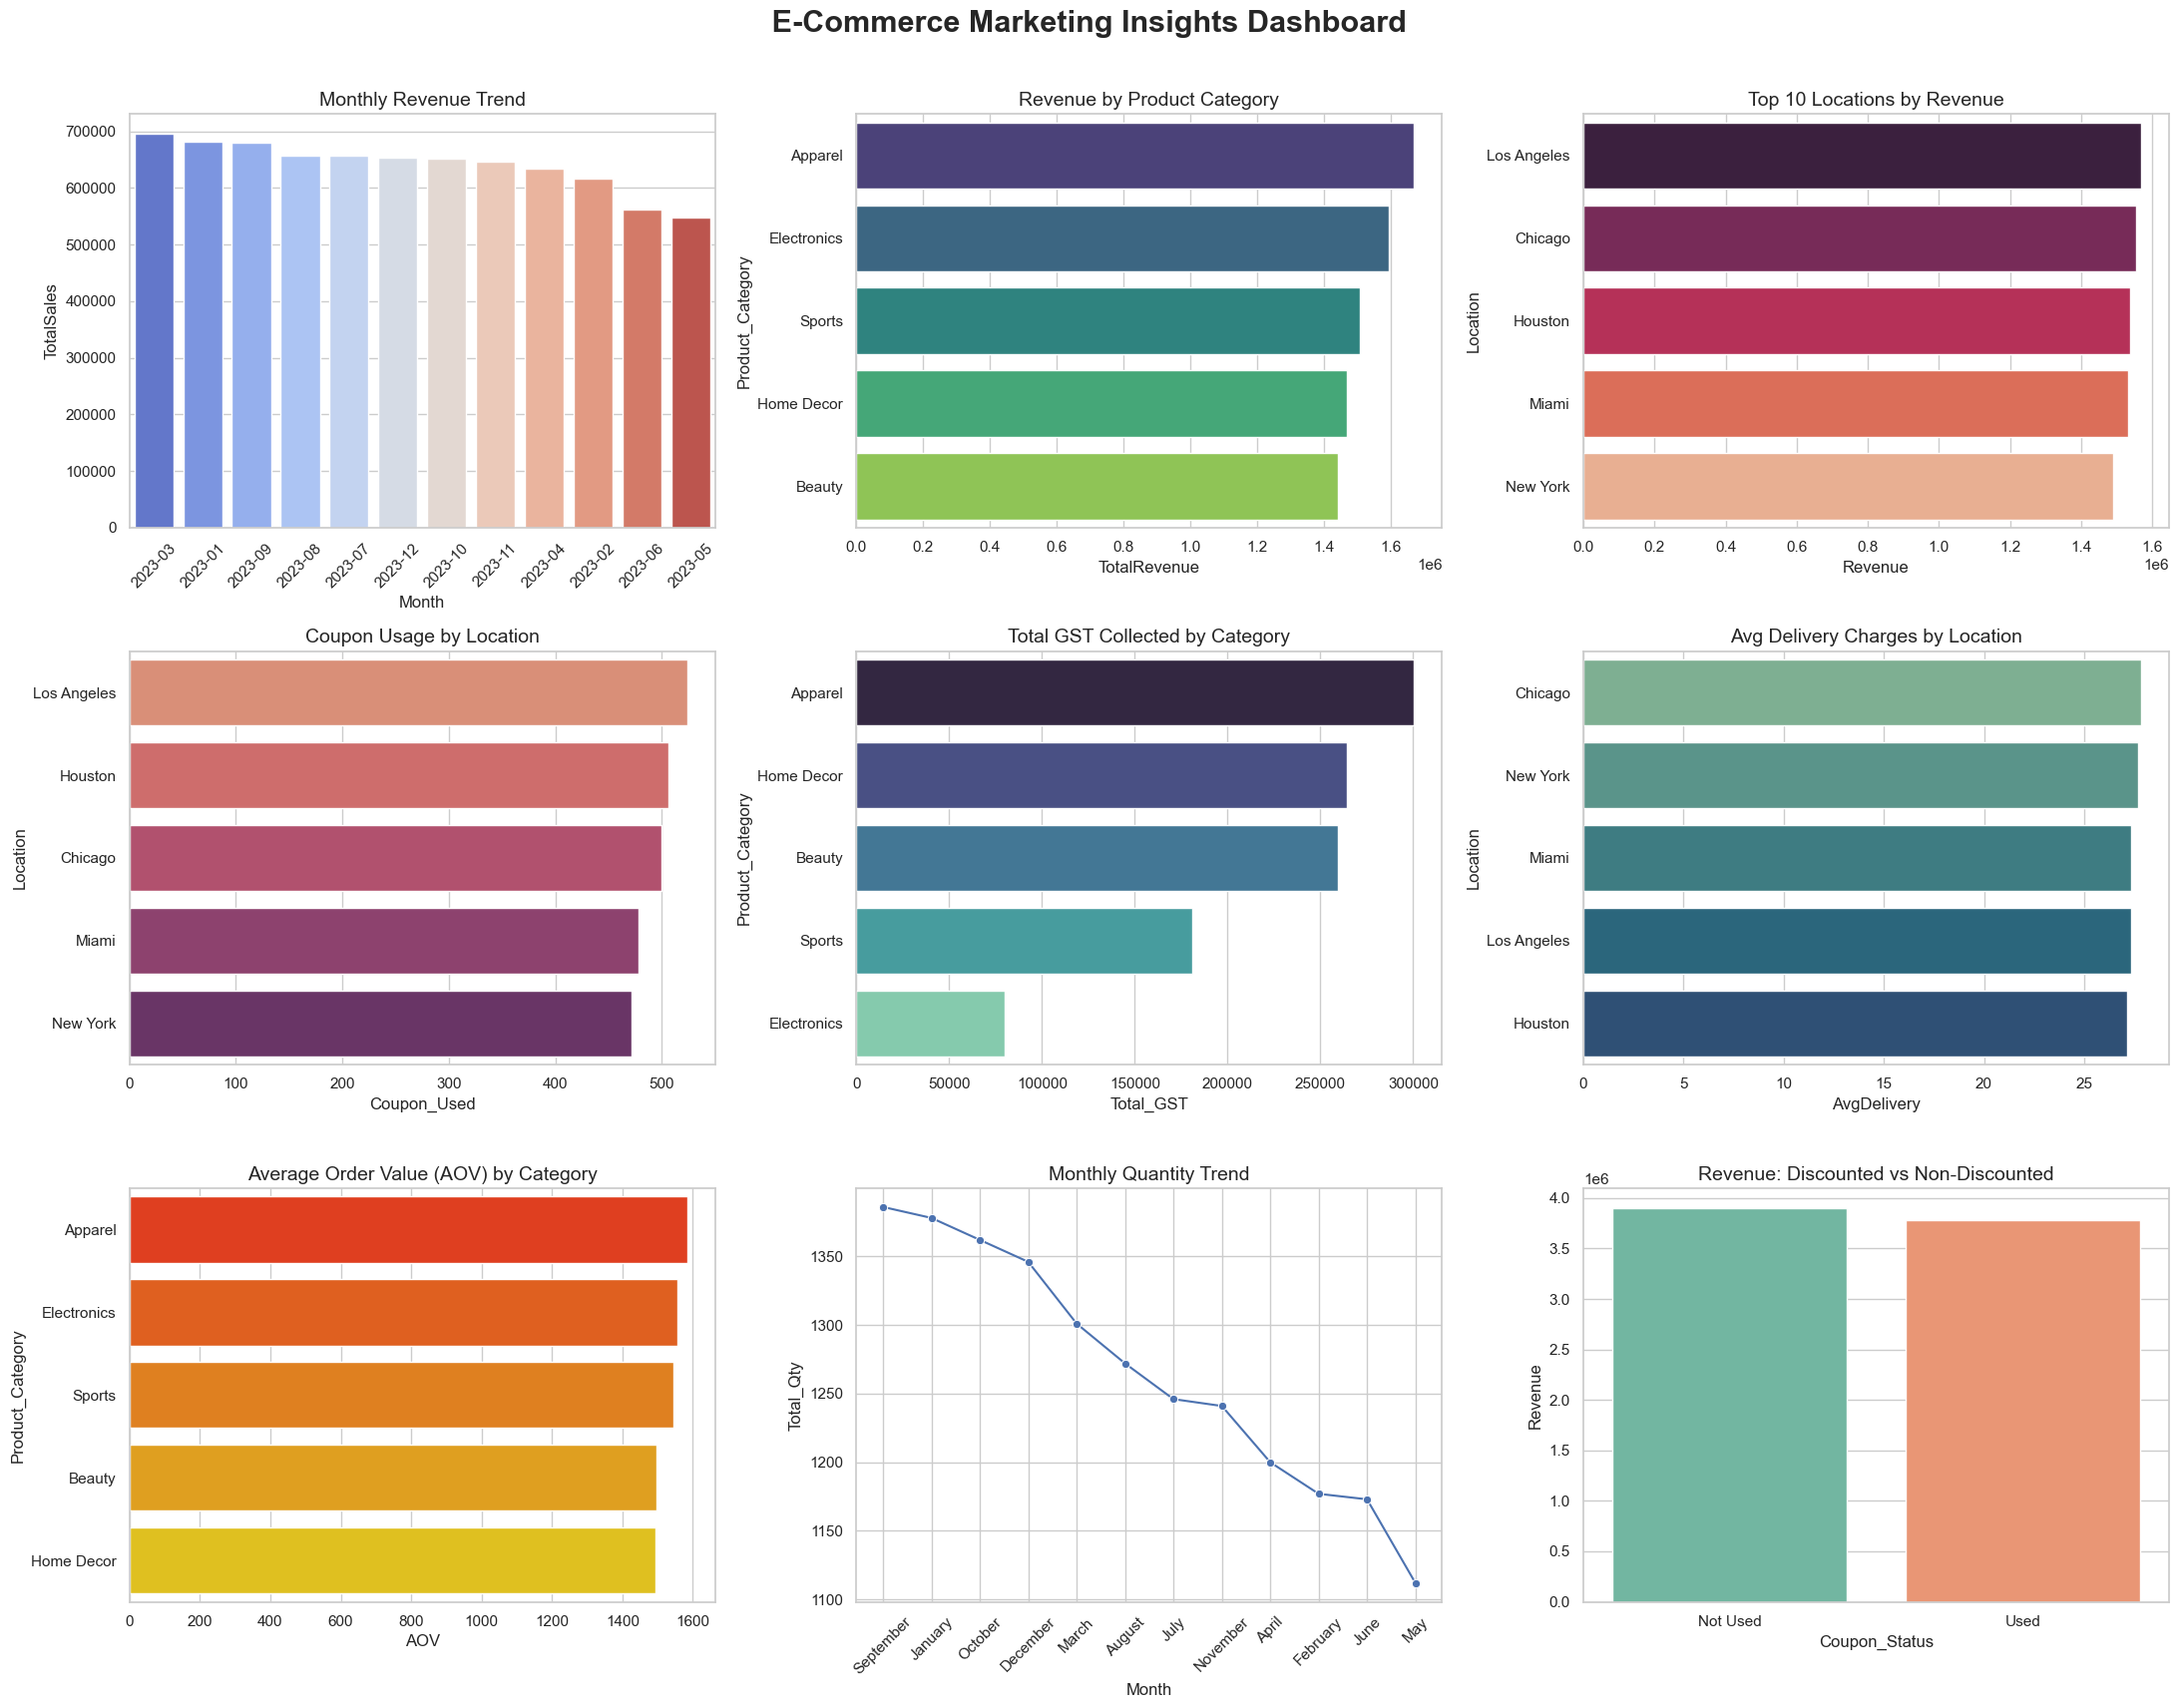

In [3]:
# --------------------------------------------------------
# FINAL MARKETING INSIGHTS DASHBOARD 
# --------------------------------------------------------
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --- DB Connection ---
def get_connection():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="Janani@1997",
        database="db"
    )

# --- Utility to Fetch Data ---
def fetch_data(proc):
    conn = get_connection()
    cursor = conn.cursor()
    cursor.callproc(proc)
    for result in cursor.stored_results():
        df = pd.DataFrame(result.fetchall(), columns=[i[0] for i in result.description])
    conn.close()
    return df

# Fetch all required data for the dashboard
df_month = fetch_data("GetTotalSalesByMonth")
df_category = fetch_data("GetTotalRevenueByCategory")
df_location = fetch_data("GetRevenueByLocation")
df_coupon_loc = fetch_data("GetCouponUsedByLocation")
df_gst = fetch_data("GetTotalGSTByCategory")
df_delivery = fetch_data("GetAvgDeliveryByLocation")
df_category_aov = fetch_data("GetAverageOrderValueByCategory")
df_quantity_month = fetch_data("GetTotalQuantityByMonth")
df_coupon_usage = fetch_data("GetRevenueByCouponStatus")

# --------------------------------------------------------
# 3 × 3 GRID (9 VISUALIZATIONS)
# --------------------------------------------------------
fig, axes = plt.subplots(3, 3, figsize=(22, 18))
fig.suptitle(" E-Commerce Marketing Insights Dashboard ", 
             fontsize=22, weight='bold', y=0.95)

# ---------------- Row 1 ---------------- #

# 1️ Monthly Revenue
sns.barplot(ax=axes[0,0], data=df_month, x='Month', y='TotalSales', palette='coolwarm')
axes[0,0].set_title("Monthly Revenue Trend", fontsize=14)
axes[0,0].tick_params(axis='x', rotation=45)

# 2️ Revenue by Category
sns.barplot(ax=axes[0,1], data=df_category, y='Product_Category', 
            x='TotalRevenue', palette='viridis')
axes[0,1].set_title("Revenue by Product Category", fontsize=14)

# 3️ Top 10 Locations by Revenue
top10_location = df_location.sort_values("Revenue", ascending=False).head(10)
sns.barplot(ax=axes[0,2], data=top10_location, y='Location', 
            x='Revenue', palette='rocket')
axes[0,2].set_title("Top 10 Locations by Revenue", fontsize=14)

# ---------------- Row 2 ---------------- #

# 4️ Coupon Usage by Location
top10_coupon = df_coupon_loc.sort_values("Coupon_Used", ascending=False).head(10)
sns.barplot(ax=axes[1,0], data=top10_coupon, y='Location', 
            x='Coupon_Used', palette='flare')
axes[1,0].set_title("Coupon Usage by Location", fontsize=14)

# 5️ GST Collected by Category
sns.barplot(ax=axes[1,1], data=df_gst, y='Product_Category', 
            x='Total_GST', palette='mako')
axes[1,1].set_title("Total GST Collected by Category", fontsize=14)

# 6️ Average Delivery Charges by Location
top10_delivery = df_delivery.sort_values("AvgDelivery", ascending=False).head(10)
sns.barplot(ax=axes[1,2], data=top10_delivery, y='Location', 
            x='AvgDelivery', palette='crest')
axes[1,2].set_title("Avg Delivery Charges by Location", fontsize=14)

# ---------------- Row 3 ---------------- #

# 7️ Average Order Value by Category
sns.barplot(ax=axes[2,0], data=df_category_aov, y='Product_Category', 
            x='AOV', palette='autumn')
axes[2,0].set_title("Average Order Value (AOV) by Category", fontsize=14)

# 8️ Quantity Trend Month Over Month
sns.lineplot(ax=axes[2,1], data=df_quantity_month, x='Month', 
             y='Total_Qty', marker='o')
axes[2,1].set_title("Monthly Quantity Trend", fontsize=14)
axes[2,1].tick_params(axis='x', rotation=45)

# 9️ Revenue by Coupon Status (Discounted vs Non-Discounted)
sns.barplot(ax=axes[2,2], data=df_coupon_usage, x='Coupon_Status', 
            y='Revenue', palette='Set2')
axes[2,2].set_title("Revenue: Discounted vs Non-Discounted", fontsize=14)

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()
